# Calculate sentiment

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [17]:
df= pd.read_csv('/home/lorisliusso/code/lorisliusso/twitter_project/Twitter/data/daily_tweets/BTC/2022-02-19.csv')

df.head()

,Unnamed: 0,text,created_at,clean_text,sentiment
0,0,@IHFLimited Be the first future-proofed leader...,2022-02-19 23:59:58+00:00,the first future proofed leaders your field wh...,0.162500
1,1,&gt;Investing in bitcoin BECAUSE you think it'...,2022-02-19 23:59:58+00:00,investing bitcoin because you think deep state,0.000000
2,2,@WClementeIII So true! And then you have peopl...,2022-02-19 23:59:57+00:00,true and then you have people like eric adams ...,0.137273
3,3,@AlBayanNews 🐦🐦🐦🐦🐦🐦🐦🐦🐦🐦\n\n ...,2022-02-19 23:59:56+00:00,global project connect the whole world with bl...,0.100000
4,4,@MaccWillSmacc counter lil bro\n\n+ need help ...,2022-02-19 23:59:55+00:00,counter lil bro need help recovering hacked co...,0.000000


In [18]:
df=df[df.sentiment!=0.0]

In [19]:
sentiment= df.sentiment.mean()
sentiment

0.18210659195085996

# Plot after scaling

In [20]:
df= pd.read_csv('/home/lorisliusso/code/lorisliusso/twitter_project/Twitter/data/reports/report_Bitcoin.csv')
df

,Unnamed: 0,date,Close,sentiment
0,0,2022-02-11,42197.52,0.209564
1,1,2022-02-14,42586.92,0.195137
2,2,2022-02-15,44575.20,0.268671
3,3,2022-02-16,43961.86,0.157814
4,4,2022-02-17,40538.01,0.188494
5,5,2022-02-18,40022.13,0.140078
6,6,2022-02-19,40141.00,0.182107
7,6,2022-02-20,38420.00,0.206971
8,6,2022-02-21,37054.00,0.170321


In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#scaling_data

df[['sentiment', 'Close']]= scaler.fit_transform(df[['sentiment', 'Close']])
df.head()

,Unnamed: 0,date,Close,sentiment
0,0,2022-02-11,0.486532,0.533980
1,1,2022-02-14,0.652381,0.118603
2,2,2022-02-15,1.499208,2.235779
3,3,2022-02-16,1.237981,-0.955982
4,4,2022-02-17,-0.220268,-0.072655


In [22]:
# Create yesterday sentiment 

df['yesterday_sentiment']= df['sentiment'].shift(1)
df.dropna(inplace=True)
df.head()

,Unnamed: 0,date,Close,sentiment,yesterday_sentiment
1,1,2022-02-14,0.652381,0.118603,0.533980
2,2,2022-02-15,1.499208,2.235779,0.118603
3,3,2022-02-16,1.237981,-0.955982,2.235779
4,4,2022-02-17,-0.220268,-0.072655,-0.955982
5,5,2022-02-18,-0.439986,-1.466637,-0.072655


Text(0.5, 1.0, 'Close VS Yesterday Sentiment')

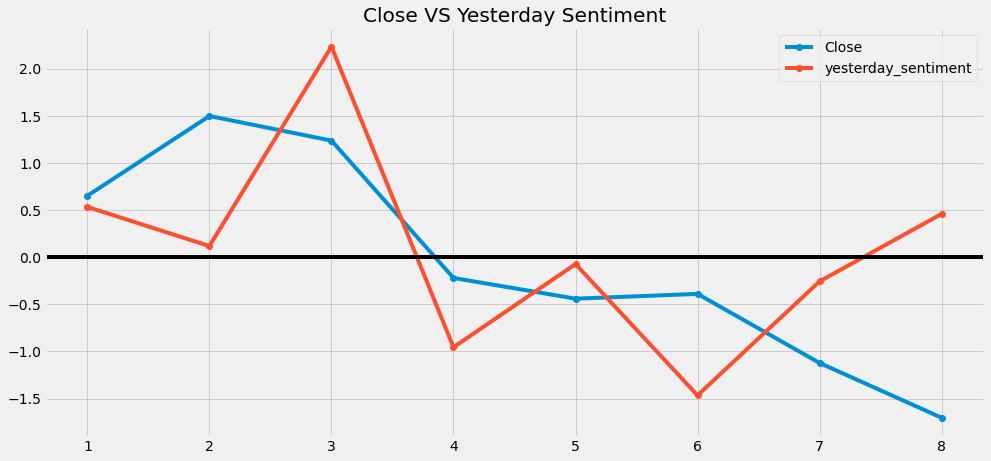

In [26]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,7));
plt.plot(df.Close, marker='o',label='Close')
plt.plot(df.yesterday_sentiment, marker='o',label='yesterday_sentiment')
plt.axhline(y=0.0, color='black', linestyle='-')
plt.legend()
plt.title('Close VS Yesterday Sentiment')

# Implement Random Forest Regression Model

In [28]:
final_df= pd.read_csv('/home/lorisliusso/code/lorisliusso/twitter_project/Twitter/data/reports/report_Bitcoin.csv')
final_df

,Unnamed: 0,date,Close,sentiment
0,0,2022-02-11,42197.52,0.209564
1,1,2022-02-14,42586.92,0.195137
2,2,2022-02-15,44575.20,0.268671
3,3,2022-02-16,43961.86,0.157814
4,4,2022-02-17,40538.01,0.188494
5,5,2022-02-18,40022.13,0.140078
6,6,2022-02-19,40141.00,0.182107
7,6,2022-02-20,38420.00,0.206971
8,6,2022-02-21,37054.00,0.170321


In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#scaling_data

final_df[['sentiment']]= scaler.fit_transform(final_df[['sentiment']])
final_df

,Unnamed: 0,date,Close,sentiment
0,0,2022-02-11,42197.52,0.533980
1,1,2022-02-14,42586.92,0.118603
2,2,2022-02-15,44575.20,2.235779
3,3,2022-02-16,43961.86,-0.955982
4,4,2022-02-17,40538.01,-0.072655
5,5,2022-02-18,40022.13,-1.466637
6,6,2022-02-19,40141.00,-0.256555
7,6,2022-02-20,38420.00,0.459344
8,6,2022-02-21,37054.00,-0.595876


In [30]:
final_df['yesterday_sentiment']= final_df['sentiment'].shift(1)
final_df.dropna(inplace=True)
final_df

,Unnamed: 0,date,Close,sentiment,yesterday_sentiment
1,1,2022-02-14,42586.92,0.118603,0.533980
2,2,2022-02-15,44575.20,2.235779,0.118603
3,3,2022-02-16,43961.86,-0.955982,2.235779
4,4,2022-02-17,40538.01,-0.072655,-0.955982
5,5,2022-02-18,40022.13,-1.466637,-0.072655
6,6,2022-02-19,40141.00,-0.256555,-1.466637
7,6,2022-02-20,38420.00,0.459344,-0.256555
8,6,2022-02-21,37054.00,-0.595876,0.459344


# Calculate RMSE 

In [31]:
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error

def rmse(y, y_pred):
    value = np.sqrt(mean_squared_error(y, y_pred))
    return value

rmse_metric= make_scorer(rmse)

In [32]:
from sklearn.metrics import mean_absolute_error

def mae(y, y_pred):
    print(y)
    print(y.shape)
    print(y_pred.shape)
    value = mean_absolute_error(y, y_pred)
    return value

mae_metric= make_scorer(mae)

In [34]:
#Calculate RMSE, MAE

model= RandomForestRegressor()

X= final_df[['yesterday_sentiment']]

y= final_df['Close']

rmse_score= cross_val_score(model,X,y,cv=3, scoring=rmse_metric).mean()
mae_score= cross_val_score(model,X,y,cv=3, scoring=mae_metric).mean()

print('RMSE: ', rmse_score)
print('MAE: ', mae_score)

1    42586.92
2    44575.20
3    43961.86
Name: Close, dtype: float64
(3,)
(3,)
4    40538.01
5    40022.13
6    40141.00
Name: Close, dtype: float64
(3,)
(3,)
7    38420.0
8    37054.0
Name: Close, dtype: float64
(2,)
(2,)
RMSE:  3415.0149757072218
MAE:  3494.0719222222165
